<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/00.%EC%B6%94%EA%B0%80%ED%95%99%EC%8A%B5/%ED%95%B4%EC%84%A4/ch00_04_OpenCV%ED%99%9C%EC%9A%A9_haarcascade_%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.04. OpenCV 활용 - haarcascade 객체인식

---
* 날짜:
* 이름:

## 학습내용
    - 이미지에서 객체 인식하기
    - 동영상에서 객체 인식하기

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

- [face-recognition](https://face-recognition.readthedocs.io/en/latest/readme.html#features)


## 개념정리
---

![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_type.png?raw=true)



* 어려운 것 : 학습하는 거
* 쉬운 거 : 학습된걸 가져다 쓰는 거



## face recognition를 이용한 얼굴탐지
---



#### **세팅**

```
! pip install face_recognition
```

In [ ]:
! pip install face_recognition

In [2]:
import face_recognition as fr
import cv2
import matplotlib.pyplot as plt

#### **예측**

In [16]:
f_path = 'p3.PNG'
img = fr.load_image_file(f_path)# 전처리
pred = fr.face_locations(img) # 예측
print(pred, len(pred))

[(160, 613, 345, 428), (12, 408, 167, 253), (192, 291, 415, 68), (180, 737, 366, 551), (142, 1083, 365, 860), (0, 700, 150, 545)] 6


#### **결과 시각화**

* return : (y1, x2, y2, x1)

160 613 345 428
12 408 167 253
192 291 415 68
180 737 366 551
142 1083 365 860
0 700 150 545


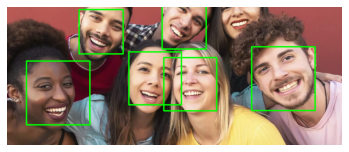

In [17]:
# 왼쪽 위 좌표 = 시작좌표 = (x1, y1)
# 오른쪽 아래 좌표 = 끝 좌표 = (x2, y2)
for (y1, x2, y2, x1) in pred:
  print(y1, x2, y2, x1)
  # 사각형 그리기
  cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3)
plt.imshow(img)
plt.axis('off')
plt.show()

## OpenCV를 이용한 얼굴탐지
---

### **Harr Feature Selection**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCGrST%2FbtqwozewRoL%2F97TeD7AXg37r84HSrpJ7n0%2Fimg.png)

[참고블로그](https://webnautes.tistory.com/1352)

### | 이미지에 적용하기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#### **세팅**

필요 파일
```
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
```

파일 위치
```
- opencv
  - data
    - haarcascades
```

In [22]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
f_path = 'p3.PNG'

In [23]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()

In [24]:
# 파라미터를 객체에 로드 (face model)
face_model.load(cv2.samples.findFile(face_cascade_name))

True

In [25]:
# 파라미터를 객체에 로드 (eyes model)
eyes_model.load(cv2.samples.findFile(eyes_cascade_name))

True

#### **전처리**

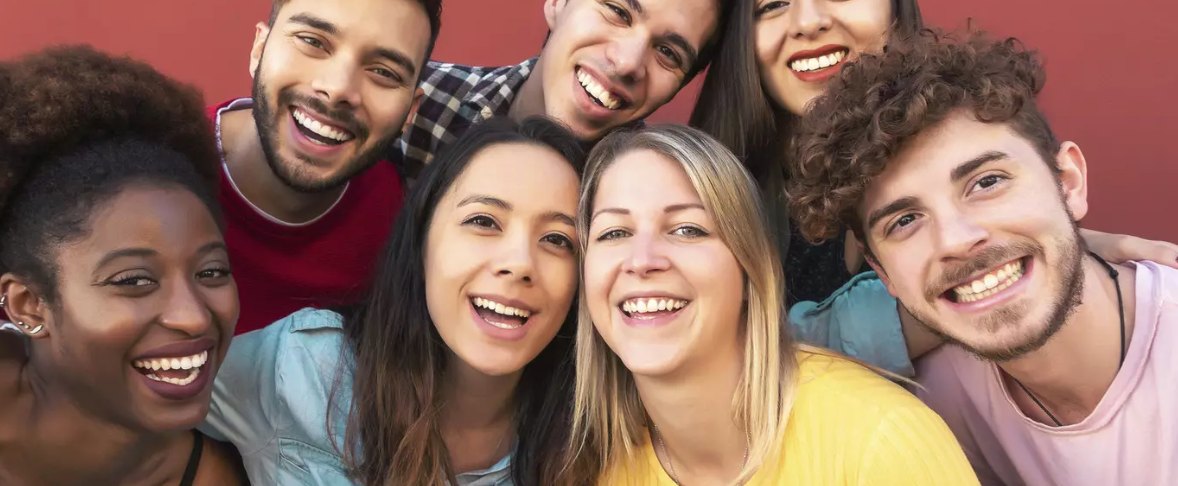

In [26]:
img = cv2.imread(f_path)
cv2_imshow(img)

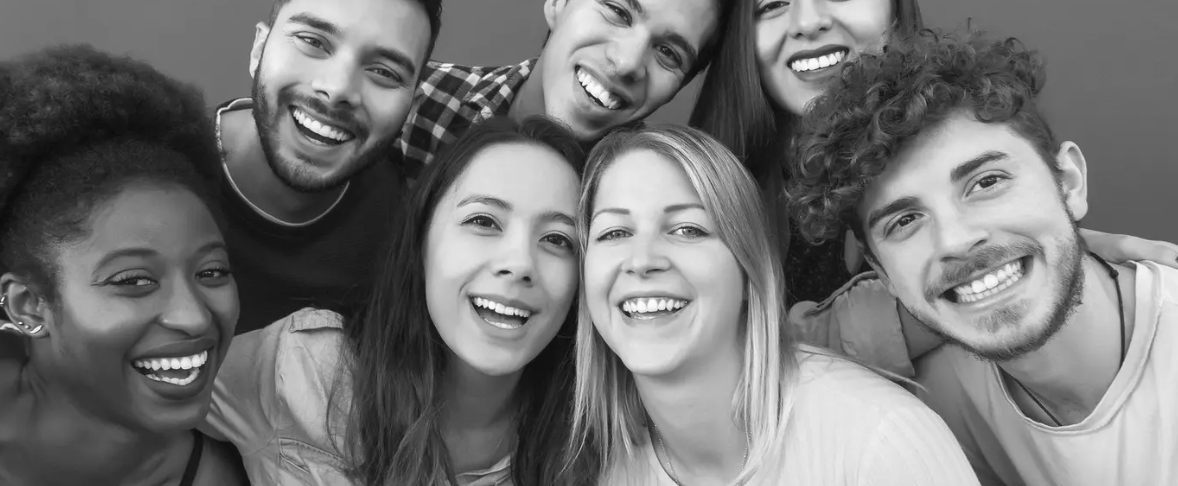

In [27]:
# 1채널(흑백) 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

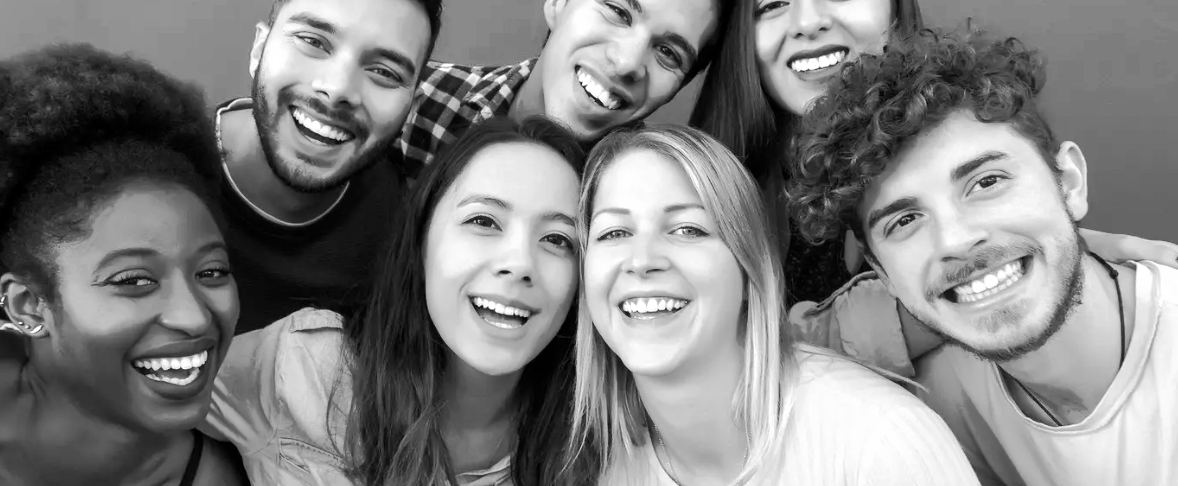

In [28]:
# 장점 : 노이즈 제거
hist = cv2.equalizeHist(gray)
cv2_imshow(hist)

#### **예측**


In [35]:
pred = face_model.detectMultiScale(hist)
print(pred)

[[416 153 201 201]
 [559 160 183 183]
 [ 63 197 212 212]]


* result : (x1, y1, w, h) 

In [36]:
x, y, w, h = pred[0]
print(x, y, w, h)

416 153 201 201


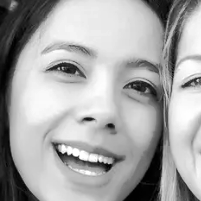

In [37]:
# 좌표 부분만 크롭
croped = hist[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(croped)

In [38]:
# 눈을 찾는 모델
pred_eyes = eyes_model.detectMultiScale(croped)
print(pred_eyes)

[[ 44  46  46  46]
 [117  66  43  43]]


In [39]:
x, y, w, h = pred_eyes[0]
print(x, y, w, h)

44 46 46 46


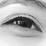

In [41]:
# 좌표 부분만 크롭
eye = croped[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(eye)

#### **함수화**

In [46]:
def path2detect(path):
  # 전처리
  org_img = cv2.imread(path)
  img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)

  # 예측 및 시각화
  face_preds = face_model.detectMultiScale(img)  # 얼굴인식
  for (x, y, w, h) in face_preds: # 얼굴마다,
    #print(f'face: {x},{y},{w},{h}') # 좌표 출력
    cv2.rectangle(org_img, (x, y), (x+w, y+h), (0,255,0), 3) # 바운딩박스 그리기 
    face = img[y:y+h, x:x+w] # 눈인식을 위한 얼굴 크롭
    
    eyes_preds = eyes_model.detectMultiScale(face) # 눈 인식
    for (x2, y2, w2, h2) in eyes_preds: # 눈 마다,
      #print(f'eyes: {x2},{y2},{w2},{h2}') # 좌표 출력
      center = (x + x2 + w2//2 ,  y + y2 + h2//2) # 원본 이미지에 대한 좌표
      radius = int(round((w2+h2)*0.25)) # 반지름
      cv2.circle(org_img, center, radius, (0,255,255), 3) # 원 그리기
  cv2_imshow(org_img)

* 함수사용

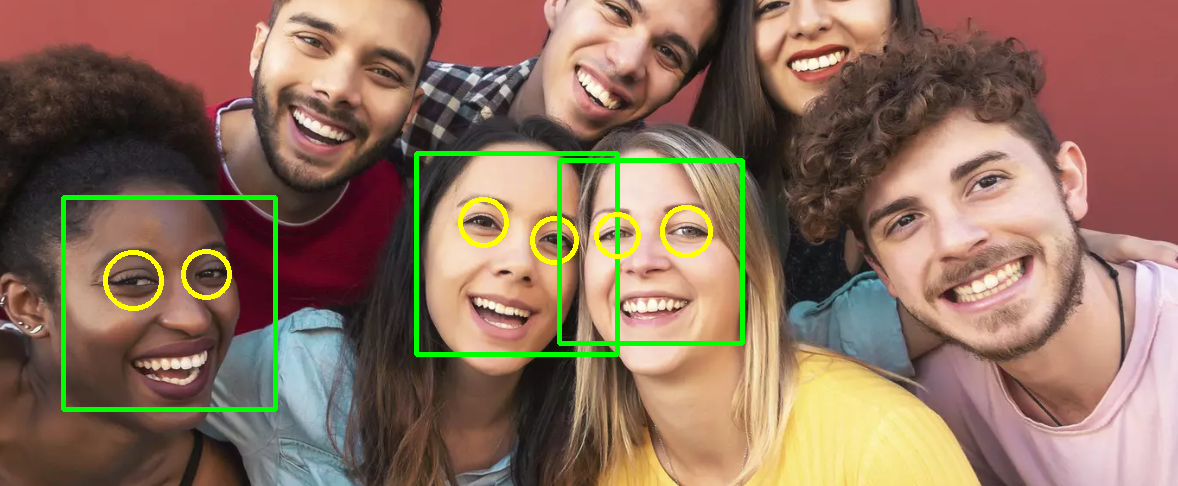

In [47]:
path2detect('p3.PNG')

### | 비디오에 적용하기

#### **세팅**


#### **함수화**

## 과제
---



### **과제 01**

[히스토그램](https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html)

[히스토그램 균일화](https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html)


### **과제 02**
```
- haarcascade_smile.xml
- haarcascade_upperbody.xml
```